# Example Notebook for Converting a File to VDF

## Converting the File

In [25]:
# import the generic converter
from util.generic_vdf_convert import GenericVDFConverter

In [26]:
# Set input paths
config_path = (
    "example_convert_config.yaml"
)
file_path = (
    "sample_files/example_file.csv"
)

In [27]:
converter = GenericVDFConverter(file_path, config_path)

In [28]:
converter.convert()

Reading in data...
Formatting data...
Updating header dictionary...
Timezone was not defined: defaulted to PST
Adding units...
Verification Warning: Unit 'other' for column 'Step Time' is not valid.
Completed generation of VDF file at path: sample_files/VDF/example_file_VDF.csv


/opt/conda/lib/python3.9/site-packages/pandas/core/base.py:1055: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(self).is_monotonic



## Inspecting the Results

In [29]:
# Showing the metadata that was added to the VDF file.
converter.header_dict

{'Start Time': 1659044022000, 'Timezone': 'America/Los_Angeles'}

In [30]:
# Take a look at the VDF time data (units included)
converter.final_df.head()

,Test Time,Voltage,Current,Ambient_Temperature,Aux_dV/dT (V/s),Step Time,Step Index,Temperature
-1,second,volt,amp,celsius,volt-second,other,None,celsius
0,0.003,1.386621,0.0,23.0,-0.000128,0.003,1,23.0
1,0.022,1.386628,0.0,24.0,-0.000128,0.0027,2,24.0
2,0.0407,1.386586,0.0,24.0,0.053282,0.0028,3,24.0
3,0.3908,1.242055,-20.16376,23.3,0.546795,0.3065,4,23.3


In [31]:
# Take a look at the raw time data read in from the original file
converter.time_df.head()

,Test_Time,Main_Voltage,Main_Current,Ambient_Temperature,Aux_dV/dT (V/s),Step Time,Step_Index
0,0.0030,1.386621,0.00000,23.0,-0.000128,0.0030,1
1,0.0220,1.386628,0.00000,24.0,-0.000128,0.0027,2
2,0.0407,1.386586,0.00000,24.0,0.053282,0.0028,3
3,0.3908,1.242055,-20.16376,23.3,0.546795,0.3065,4
4,5.4032,1.048895,-40.00278,22.0,-0.026939,5.0022,5


In [32]:
# Take a look at the formatted data (without the added units)
converter.formatted_df.head()

,Test Time,Voltage,Current,Ambient_Temperature,Aux_dV/dT (V/s),Step Time,Step Index,Temperature
0,0.0030,1.386621,0.00000,23.0,-0.000128,0.0030,1,23.0
1,0.0220,1.386628,0.00000,24.0,-0.000128,0.0027,2,24.0
2,0.0407,1.386586,0.00000,24.0,0.053282,0.0028,3,24.0
3,0.3908,1.242055,-20.16376,23.3,0.546795,0.3065,4,23.3
4,5.4032,1.048895,-40.00278,22.0,-0.026939,5.0022,5,22.0


<AxesSubplot:xlabel='Test Time'>

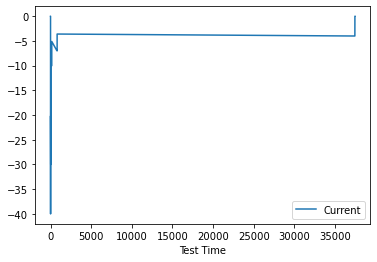

In [33]:
# Visualize the data for a specific column
converter.formatted_df.plot(x="Test Time", y="Current")